<a href="https://colab.research.google.com/github/ShamsAl/RNN_Sentiment-analysis/blob/main/CSE4238_Assignment_3_170104005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drive mount code

In [1]:
# from google.colab import drive
# drive.mount('./drive')

# Dataset Creation

## Download dataset 3



In [2]:
!gdown --id 1hgfcQHIlfnnDTSUAA_3--m-YA7BelKl3

Downloading...
From: https://drive.google.com/uc?id=1hgfcQHIlfnnDTSUAA_3--m-YA7BelKl3
To: /content/Dataset 3.csv
100% 999k/999k [00:00<00:00, 43.3MB/s]


## Import package

In [3]:
# import some importent library or packages 
import matplotlib.pyplot as plt
import warnings
import time,sys
import copy

import pandas as pd
import numpy as np
import cv2
import os
import pathlib
import zipfile
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import pathlib
import shutil
from pathlib import Path
from collections import Counter
!pip install torchsummary
from torchsummary import summary
from sklearn.utils import shuffle
!pip install torchviz
from torchviz import make_dot, make_dot_from_trace

warnings.filterwarnings('ignore')
torch.manual_seed(0)

## Read downloaded dataset

In [4]:
df = pd.read_csv('/content/Dataset 3.csv',encoding='unicode_escape')

In [5]:
df.columns ## columns name

Index(['tweets', 'sentiment'], dtype='object')

In [6]:
df['sentiment'].value_counts() ## get number of data in `polarity` class

0    8000
1    2314
Name: sentiment, dtype: int64

In [7]:
df['tweets'].value_counts()

Mom's depression tied to kids' emotional, intellectual development  https://ift.tt/2HtVZCEÃÂ                                                   11
25-04-18                                                                                                                                         4
More than 1 in 20 US children and teens have anxiety or depression  https://www.sciencedaily.com/releases/2018/04/180424184119.htmÃÂ Ã¢ÂÂ¦     4
[Zicutake] Depression can be prevented by exercise  https://goo.gl/fb/Mu7k6tÃÂ                                                                  3
suffering from chronic depression https://vine.co/v/iu3l2lPBhiKÃÂ                                                                               3
                                                                                                                                                ..
@mojustice I've heard this fall. I'm waiting too!                                                                     

## Dataset splitting

In [8]:
## split dataset based on the class
traning_split_size = 0.8
df_class_1 = df[df['sentiment'] == 1]
df_class_0 = df[df['sentiment'] == 0]

trainSize = int(len(df_class_0) * traning_split_size)
Traning_class_0 = df_class_0[:trainSize]
Test_class_0 = df_class_0[trainSize:]

trainSize = int(len(df_class_1) * traning_split_size)
Traning_class_1 = df_class_1[:trainSize]
Test_class_1 = df_class_1[trainSize:]

In [9]:
## traning dataset create
li = [Traning_class_0,Traning_class_1]
frame = pd.concat(li, axis=0, ignore_index=True)
frame = shuffle(frame)
frame.reset_index(inplace=True, drop=True)
frame.to_csv('Train-Dataset.csv',index=False)
frame

,tweets,sentiment
0,@ReneeCarrollAZ @KyleKashuv These snowflakes w...,1
1,loving summer,0
2,About to pass out! Super tired...good night tw...,0
3,Photo: havent-got-a-prayer: Me too http://tum...,0
4,@macitout and recording music here with Nona H...,0
...,...,...
8246,#GeneChat Large-population studies that look f...,1
8247,I spent all of 10th grade crying for absolutel...,1
8248,I mean I think I'm just being funny but appare...,1
8249,"@comeagainjen Jenn, I just wanted to say that ...",0


In [10]:
## testing dataset create
li = [Test_class_0,Test_class_1]
frame = pd.concat(li, axis=0, ignore_index=True)
frame = shuffle(frame)
frame.reset_index(inplace=True, drop=True)
frame.to_csv('Test-Dataset.csv',index=False)
frame

,tweets,sentiment
0,@rawrAlii Looking for Alice......nice to mee...,0
1,Just just stop! Stop doingg things that you mi...,1
2,"@wowie It's a good movie, I like that one. Nev...",0
3,lowpass on pizzicato strings - number one caus...,1
4,@Rotmush no.. I think it was Ori,0
...,...,...
2058,@amerj thanks,0
2059,You're the P. Swayer to my B. Davis,0
2060,@aaronmcarroll i try my best to inspire you wi...,0
2061,@sjrozas I can pick them up for you. You'll be...,0


# Text cleaning

In [11]:
# import some importent library or packages 
import matplotlib.pyplot as plt
import warnings
import time,sys,re,string
import copy

import pandas as pd
import numpy as np
import cv2
import os
import pathlib
import zipfile
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset

import torch.optim as optim
import pathlib
import shutil
from pathlib import Path
from collections import Counter
!pip install torchsummary
from torchsummary import summary
from sklearn.utils import shuffle
!pip install torchviz
from torchviz import make_dot, make_dot_from_trace
try:
  import contractions
except:
  !pip install contractions
import contractions
from torchtext.legacy.data import Field, TabularDataset, BucketIterator
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator, Vectors, GloVe

import nltk
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('averaged_perceptron_tagger')
    nltk.data.find('brown')
except LookupError:
    nltk.download('averaged_perceptron_tagger')
    nltk.download('brown')
    nltk.download('punkt')
from nltk import sent_tokenize,word_tokenize


warnings.filterwarnings('ignore')
torch.manual_seed(0)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
traning_df = pd.read_csv('/content/Train-Dataset.csv')
testing_df = pd.read_csv('/content/Test-Dataset.csv')

In [13]:
traning_df

,tweets,sentiment
0,@ReneeCarrollAZ @KyleKashuv These snowflakes w...,1
1,loving summer,0
2,About to pass out! Super tired...good night tw...,0
3,Photo: havent-got-a-prayer: Me too http://tum...,0
4,@macitout and recording music here with Nona H...,0
...,...,...
8246,#GeneChat Large-population studies that look f...,1
8247,I spent all of 10th grade crying for absolutel...,1
8248,I mean I think I'm just being funny but appare...,1
8249,"@comeagainjen Jenn, I just wanted to say that ...",0


In [14]:
def clean_text(tweets):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers. removibng miltiple full stop'''
    tweets = str(tweets).lower()
    tweets = re.sub('\[.*?\]', '', tweets)
    tweets = re.sub('https?://\S+|www\.\S+', '', tweets)
    tweets = re.sub('<.*?>+', '', tweets)
    tweets = re.sub('[%s]' % re.escape(string.punctuation), '', tweets)
    tweets = re.sub('\n', '', tweets)
    tweets = re.sub('\w*\d\w*', '', tweets)
    tweets = re.sub(r'\.+', ".", tweets)
    return tweets

def replace_text(tweets):
    tweets = str(tweets).lower()
    tweets = tweets.encode('ascii', 'ignore').decode('utf-8') 
    return tweets  


for dta in [traning_df,testing_df]:
  dta['tweets_cleaning'] = dta.tweets.apply(lambda x: x.strip().lower() )
  dta['tweets_cleaning'] = dta.tweets_cleaning.apply(lambda x : " ".join(x.split()) )
  dta['tweets_cleaning'] = dta.tweets_cleaning.apply(lambda x: contractions.fix(x) )
  dta['tweets_cleaning'] = dta.tweets_cleaning.apply(lambda x: clean_text(x) )
  dta['tweets_cleaning'] = dta.tweets_cleaning.apply(lambda x: replace_text(x) )
  dta['number_of_word'] = dta.tweets_cleaning.apply(lambda x: len(word_tokenize(x)) )
  dta['number_of_letter'] = dta.tweets_cleaning.apply(lambda x: len(x) )
  del dta['tweets']
  dta['tweets'] = dta['tweets_cleaning'] 
  del dta['tweets_cleaning']



for dta in [traning_df,testing_df]:
  word_count_zero = dta[dta['number_of_word'] == 0]
  dta.drop(word_count_zero.index,inplace=True)
  letter_count_zero = dta[dta['number_of_letter'] == 0]
  dta.drop(letter_count_zero.index,inplace=True)


# # Training DF
# traning_df['text_cleaning'] = traning_df.text.apply(lambda x: x.strip().lower() )
# traning_df['text_cleaning'] = traning_df.text_cleaning.apply(lambda x : " ".join(x.split()) )
# traning_df['text_cleaning'] = traning_df.text_cleaning.apply(lambda x: contractions.fix(x) )
# traning_df['text_cleaning'] = traning_df.text_cleaning.apply(lambda x: clean_text(x) )
# traning_df['text_cleaning'] = traning_df.text_cleaning.apply(lambda x: replace_text(x) )

# # Testing DF
# testing_df['text_cleaning'] = testing_df.text.apply(lambda x: x.strip().lower() )
# testing_df['text_cleaning'] = traning_df.text_cleaning.apply(lambda x : " ".join(x.split()) )
# testing_df['text_cleaning'] = testing_df.text_cleaning.apply(lambda x: contractions.fix(x) )
# testing_df['text_cleaning'] = testing_df.text_cleaning.apply(lambda x: clean_text(x) )
# testing_df['text_cleaning'] = testing_df.text_cleaning.apply(lambda x: replace_text(x) )


In [15]:
traning_df

,sentiment,number_of_word,number_of_letter,tweets
0,1,14,119,reneecarrollaz kylekashuv these snowflakes wou...
1,0,2,13,loving summer
2,0,10,64,about to pass out super tiredgood night twitte...
3,0,5,32,photo have notgotaprayer me too
4,0,22,118,macitout and recording music here with nona he...
...,...,...,...,...
8246,1,45,266,genechat largepopulation studies that look for...
8247,1,32,166,i spent all of grade crying for absolutely no...
8248,1,34,182,i mean i think i am just being funny but appar...
8249,0,20,103,comeagainjen jenn i just wanted to say that i ...


In [16]:
alltext_length = []
allword_length = []
for val in traning_df.tweets:
  word_tok = word_tokenize(val)
  alltext_length.append(len(val))
  allword_length.append(len(word_tok))

print(max(alltext_length))
print(max(allword_length))

# traning_df.text.apply(lambda x: len(x) )

289
62


In [17]:
for val in traning_df.tweets:
  word_tok = word_tokenize(val)
  if len(word_tok) <= 1:
    print(val)

twittermaniaaaaaaaaaaa
jonathanrknight
picture
makemescream
depression  
ferngully
depression  
 thanks
llisalang
beeeeeeed
fairyfreia          
realworldmom
radiogrinch 
 with 
shopping
houseeee
 sorite
incoming
 thanks
depression  
scarych         
name
 thanks
depression  
depression  
reading
may    
quickshooter                
around
 yup
remysoon
depression
katelyniscool   
depression  
shaundiviney
 thanks
comeagainjen   
lonlonraanch
spurofmoment
  thirsty
oneofusisfdup
party 
  updates
     subway
 whaaatever
name


In [18]:
traning_df.to_csv('/content/Train-Dataset-prcessed.csv',index=False)
testing_df.to_csv('/content/Test-Dataset-prcessed.csv',index=False)

# Training & `RNN` model


In [19]:
# import some importent library or packages 
import matplotlib.pyplot as plt
import warnings
import time,sys,re,string
import copy

import pandas as pd
import numpy as np
import cv2
import os
import pathlib
import zipfile
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset

import torch.optim as optim
import pathlib
import shutil
from pathlib import Path
from collections import Counter
!pip install torchsummary
!pip install torchinfo
from torchinfo import summary
from sklearn.utils import shuffle
!pip install torchviz
from torchviz import make_dot, make_dot_from_trace
try:
  import contractions
except:
  !pip install contractions
import contractions
from torchtext.legacy.data import Field, TabularDataset, BucketIterator
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator, Vectors, GloVe
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

import nltk
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('averaged_perceptron_tagger')
    nltk.data.find('brown')
except LookupError:
    nltk.download('averaged_perceptron_tagger')
    nltk.download('brown')
    nltk.download('punkt')
from nltk import sent_tokenize,word_tokenize


warnings.filterwarnings('ignore')
torch.manual_seed(0)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
traning_df = pd.read_csv('/content/Train-Dataset-prcessed.csv')
testing_df = pd.read_csv('/content/Test-Dataset-prcessed.csv')

In [21]:
traning_df

,sentiment,number_of_word,number_of_letter,tweets
0,1,14,119,reneecarrollaz kylekashuv these snowflakes wou...
1,0,2,13,loving summer
2,0,10,64,about to pass out super tiredgood night twitte...
3,0,5,32,photo have notgotaprayer me too
4,0,22,118,macitout and recording music here with nona he...
...,...,...,...,...
8239,1,45,266,genechat largepopulation studies that look for...
8240,1,32,166,i spent all of grade crying for absolutely no...
8241,1,34,182,i mean i think i am just being funny but appar...
8242,0,20,103,comeagainjen jenn i just wanted to say that i ...


In [22]:
label_field = Field(sequential=False, use_vocab=False, batch_first=True, dtype=torch.float)
text_field = Field(tokenize='spacy', lower=True, include_lengths=True, batch_first=True)
fields = [('sentiment', label_field),  ('tweets', text_field)]


train_data = TabularDataset(path="/content/Train-Dataset-prcessed.csv",
                                 format="csv",
                                  fields=fields,
                                 skip_header=True)

valid_data = TabularDataset(path="/content/Test-Dataset-prcessed.csv",
                                 format="csv",
                                  fields=fields,
                                 skip_header=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_iter = BucketIterator(train_data, batch_size=32, sort_key=lambda x: len(x.tweets),
                            device=device, sort=True, sort_within_batch=True)
valid_iter = BucketIterator(valid_data, batch_size=32, sort_key=lambda x: len(x.tweets),
                            device=device, sort=True, sort_within_batch=True)


text_field.build_vocab(train_data,) # min_freq=3,vectors = "glove.6B.100d"
label_field.build_vocab(train_data)

In [23]:
#No. of unique tokens in text
print("Size of TEXT vocabulary:",len(text_field.vocab))

#No. of unique tokens in label
print("Size of LABEL vocabulary:",len(label_field.vocab))

#Commonly used words
print(text_field.vocab.freqs.most_common(10))  

#Word dictionary
print(text_field.vocab.stoi)   

Size of TEXT vocabulary: 64
Size of LABEL vocabulary: 3
[('8', 459), ('6', 446), ('7', 427), ('5', 407), ('9', 407), ('13', 379), ('10', 376), ('11', 369), ('12', 359), ('4', 329)]
defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x7fbf0c7157d0>>, {'<unk>': 0, '<pad>': 1, '8': 2, '6': 3, '7': 4, '5': 5, '9': 6, '13': 7, '10': 8, '11': 9, '12': 10, '4': 11, '15': 12, '14': 13, '16': 14, '18': 15, '17': 16, '3': 17, '19': 18, '21': 19, '20': 20, '23': 21, '22': 22, '24': 23, '2': 24, '25': 25, '26': 26, '27': 27, '29': 28, '28': 29, '1': 30, '30': 31, '32': 32, '31': 33, '36': 34, '38': 35, '39': 36, '45': 37, '41': 38, '33': 39, '34': 40, '42': 41, '43': 42, '48': 43, '49': 44, '44': 45, '47': 46, '46': 47, '37': 48, '40': 49, '35': 50, '50': 51, '52': 52, '51': 53, '53': 54, '54': 55, '55': 56, '56': 57, '58': 58, '61': 59, '57': 60, '59': 61, '60': 62, '62': 63})


## RNN Model

In [24]:
import torch.nn as nn
class RNNModel(torch.nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(RNNModel, self).__init__()
        self.hidden_dim = hidden_dim

        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)

        self.rnn = nn.RNN(embedding_dim, hidden_dim, 2, batch_first=True, nonlinearity='relu')
        self.fc = nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        # print(len(sentence))
        # x = embeds.view(len(sentence), 1, -1)
         # Initialize hidden state with zeros
        h0 = torch.autograd.Variable(torch.zeros(2, sentence.size(0), self.hidden_dim))
            
        out, hn = self.rnn(embeds, h0)
        out = self.fc(out[:, -1, :]) 
        return out


In [25]:
EMBEDDING_DIM = 6
HIDDEN_DIM = 6
model = RNNModel(EMBEDDING_DIM, HIDDEN_DIM, len(text_field.vocab), 1)
loss_function = torch.nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = torch.nn.BCEWithLogitsLoss()

In [26]:
def binary_accuracy(preds, y):

    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() 
    acc = correct.sum() / len(correct)
    return acc

In [27]:
# training function 
def train(model, iterator):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for i,batch in enumerate( iterator,1):
        tweets, tweets_lengths = batch.tweets
        
        optimizer.zero_grad()
        predictions = model(tweets,).squeeze(1)
        
        loss = criterion(predictions, batch.sentiment)
        acc = binary_accuracy(predictions, batch.sentiment)

        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()

        print_val = f"running_loss : {(loss.item()):.6f}\t"
        print_val += f"running_corrects : {acc.item():.6f}\t"  
        sys.stdout.write('\r' + str(print_val))
        

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [28]:
def evaluate(model, iterator):
    
    epoch_loss = 0
    epoch_acc = 0
    model.eval()
    
    with torch.no_grad():
        for batch in iterator:
            tweets, tweets_lengths = batch.tweets
            predictions = model(tweets,).squeeze(1)
            loss = criterion(predictions, batch.sentiment)
            acc = binary_accuracy(predictions, batch.sentiment)
            
            epoch_acc += acc.item()
            epoch_loss += loss.item()
        
    return  epoch_loss / len(iterator), epoch_acc / len(iterator) 

In [29]:
t = time.time()
loss=[]
acc=[]
val_acc=[]
val_loss=[]
num_epochs = 500

for epoch in range(num_epochs):
    
    train_loss, train_acc = train(model, train_iter)
    valid_loss, valid_acc = evaluate(model, valid_iter)
    
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%  | Val. Acc: {valid_acc*100:.2f}%')
    # print(f'\t')
    
    loss.append(train_loss)
    acc.append(train_acc)
    val_loss.append(valid_loss)
    val_acc.append(valid_acc)
    
print(f'time:{time.time()-t:.3f}')

running_loss : 0.620854	running_corrects : 0.650000		Train Loss: 0.625 | Train Acc: 68.03%  | Val. Acc: 77.74%
running_loss : 0.642528	running_corrects : 0.650000		Train Loss: 0.534 | Train Acc: 77.58%  | Val. Acc: 77.74%
running_loss : 0.648882	running_corrects : 0.650000		Train Loss: 0.526 | Train Acc: 77.58%  | Val. Acc: 77.74%
running_loss : 0.648717	running_corrects : 0.650000		Train Loss: 0.525 | Train Acc: 77.58%  | Val. Acc: 77.74%
running_loss : 0.647076	running_corrects : 0.650000		Train Loss: 0.523 | Train Acc: 77.58%  | Val. Acc: 77.74%
running_loss : 0.645144	running_corrects : 0.650000		Train Loss: 0.523 | Train Acc: 77.58%  | Val. Acc: 77.74%
running_loss : 0.643093	running_corrects : 0.650000		Train Loss: 0.522 | Train Acc: 77.58%  | Val. Acc: 77.74%
running_loss : 0.640952	running_corrects : 0.650000		Train Loss: 0.521 | Train Acc: 77.58%  | Val. Acc: 77.74%
running_loss : 0.638713	running_corrects : 0.650000		Train Loss: 0.520 | Train Acc: 77.58%  | Val. Acc: 77.74%
r

# Classification Performance Metrics

In [30]:
# import some importent library or packages 
import glob,sys,os
import matplotlib.pyplot as plt
import warnings
import numpy as np
import seaborn as sn
import pandas as pd
import pathlib
import zipfile
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import time,sys
import copy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')

In [31]:
_tranning_loss = loss
_tranning_acc = acc
_validation_loss = val_loss
_validation_acc = val_acc

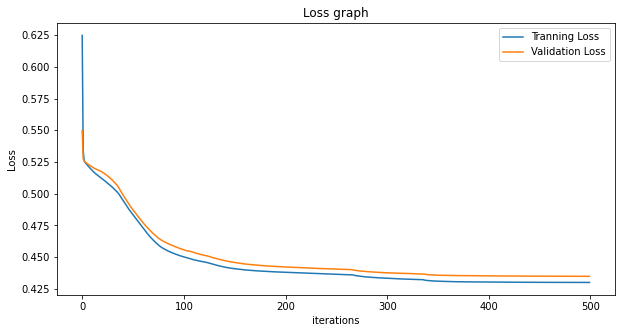

In [32]:
plt.figure(figsize=(10,5))
plt.title("Loss graph")
plt.plot(_tranning_loss,label="Tranning Loss")
plt.plot(_validation_loss,label="Validation Loss")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

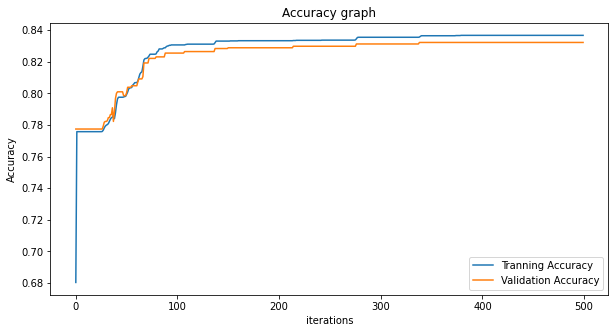

In [33]:
plt.figure(figsize=(10,5))
plt.title("Accuracy graph")
plt.plot(_tranning_acc,label="Tranning Accuracy")
plt.plot(_validation_acc,label="Validation Accuracy")
plt.xlabel("iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [35]:
y_true_tensor = torch.tensor([])
y_pred_tensor = torch.tensor([])
model.eval()
with torch.no_grad():
      for batch in valid_iter:
          tweets, tweets_lengths = batch.tweets
          predictions = model(tweets).squeeze(1)

          rounded_preds = torch.round(torch.sigmoid(predictions))
          correct = (rounded_preds == batch.sentiment).float() 

          # print(rounded_preds,batch.sentiment)

          y_true_tensor = torch.cat((y_true_tensor,batch.sentiment))
          y_pred_tensor = torch.cat((y_pred_tensor,rounded_preds))
          # acc = binary_accuracy(predictions, batch.sentiment)
          # print(acc)

In [36]:
y_true = y_true_tensor.type(torch.LongTensor).tolist()
y_pred = y_pred_tensor.type(torch.LongTensor).tolist()

In [37]:
matrice = confusion_matrix(y_true,y_pred)
matrice

array([[1584,   14],
       [ 333,  128]])

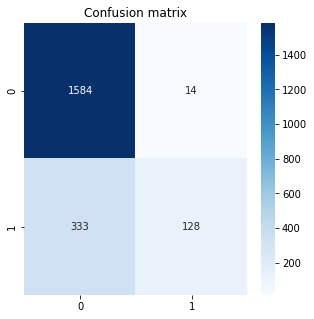

In [38]:
df_cm = pd.DataFrame(matrice,columns=[0,1],index=[0,1])
plt.figure(figsize=(5,5))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues',)
plt.title(f"Confusion matrix")
plt.show()

In [39]:
classify_report = classification_report(y_true, y_pred, )
print(classify_report)

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1598
           1       0.90      0.28      0.42       461

    accuracy                           0.83      2059
   macro avg       0.86      0.63      0.66      2059
weighted avg       0.84      0.83      0.79      2059

